In [1]:
# This code implements section 3.1.1 of the paper: 3D rotation of fruits
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

image = cv2.imread("./data/oranges/obj0001/im00.png")

SHOW ORIGINAL IMAGE

(276, 286, 3)


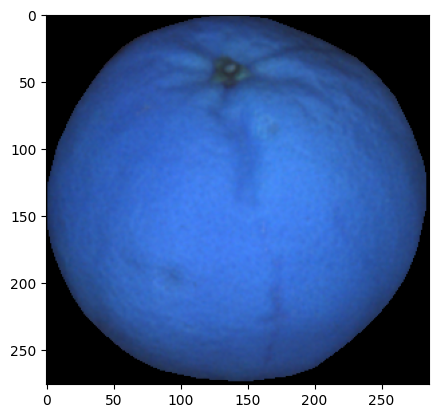

In [2]:
print(image.shape)
plt.imshow(image)

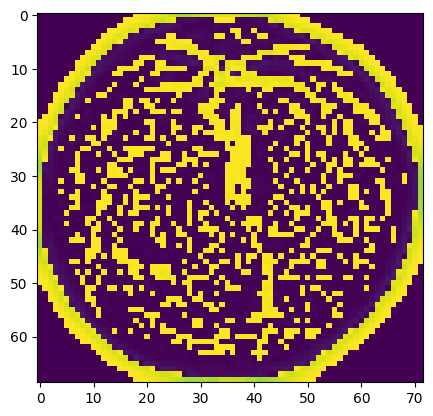

In [3]:
# Step 1: Reduce the number of color channels by keeping the green channel
green_channel = image[:, :, 1]  # Green channel is at index 1 (0 for blue, 2 for red)
preprocessed_image = green_channel

# Step 2: Reduce image resolution by downsampling
downsampling_factor = 4
downsampled_image = cv2.resize(preprocessed_image, None, fx=1/downsampling_factor, fy=1/downsampling_factor, interpolation=cv2.INTER_AREA)

# Step 3: Apply high-pass filtering using Gaussian blur
sigma = 1.25
blurred_image = cv2.GaussianBlur(downsampled_image, (0, 0), sigma)
high_pass_image = downsampled_image - blurred_image

plt.imshow(high_pass_image)

In [24]:
# gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(high_pass_image, 0, 255, cv2.THRESH_BINARY)

[  0 255]
(69, 72)


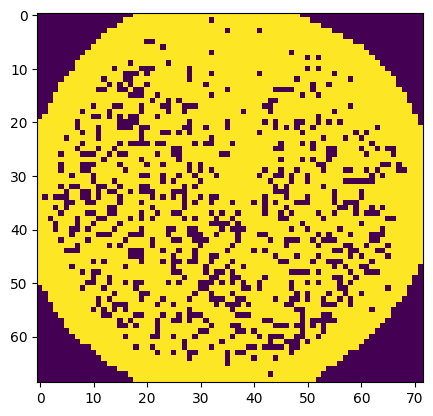

In [25]:
unique_values = np.unique(mask)
print(unique_values)

print(mask.shape)
plt.imshow(mask)

In [26]:
# Calculate the mean and initialize covariance matrix
mean = np.mean(mask, axis=1)
cov_matrix = np.zeros((mask.shape[1], mask.shape[1]), dtype=np.float64)

flags = cv2.COVAR_NORMAL | cv2.COVAR_ROWS

cv2.calcCovarMatrix(samples=mask, mean=mean, covar=cov_matrix, flags=flags)
print(cov_matrix.shape)

(72, 72)


In [27]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

print(sorted_eigenvalues[0], sorted_eigenvalues[-1])

(13732739.759500243+0j) (2.040188998519312e-10-1.357179385436844e-10j)


In [30]:
# GET THE AXES OF THE PROJECTED ELLIPSE

a = 2 * (math.sqrt(sorted_eigenvalues[0])) # semi major axis of projected ellipse
b = 2 * (math.sqrt(sorted_eigenvalues[-1])) # semi minor axis of projected ellipse

print(a)
print(b)

7411.542284707075
2.8567036937836673e-05


/var/folders/tv/j_hkyyws5nzb4j9vp4gjhj500000gn/T/ipykernel_74825/4167769686.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  a = 2 * (math.sqrt(sorted_eigenvalues[0])) # semi major axis of projected ellipse
/var/folders/tv/j_hkyyws5nzb4j9vp4gjhj500000gn/T/ipykernel_74825/4167769686.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  b = 2 * (math.sqrt(sorted_eigenvalues[-1])) # semi minor axis of projected ellipse
